In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [0]:
liver_df = pd.read_csv('/content/liverLabTrain.csv')

In [39]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [40]:
liver_df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
count,483.000000,483,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,480.000000,483.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.722567,NaN,3.299172,1.466253,287.335404,72.111801,94.627329,6.476190,3.143478,0.953583,0.718427
std,16.263700,NaN,6.358002,2.783368,232.322630,148.754051,165.268830,1.091362,0.797516,0.327034,0.450233
min,4.000000,NaN,0.400000,0.100000,75.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,NaN,0.800000,0.200000,174.500000,23.000000,25.000000,5.750000,2.600000,0.700000,0.000000
50%,45.000000,NaN,1.000000,0.300000,206.000000,34.000000,41.000000,6.500000,3.100000,0.965000,1.000000
75%,57.000000,NaN,2.600000,1.250000,298.000000,58.000000,82.500000,7.200000,3.800000,1.100000,1.000000


In [41]:
liver_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Liver_Disease'],
      dtype='object')

In [42]:
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    3
Liver_Disease                 0
dtype: int64

In [43]:
liver_df.shape


(483, 11)

In [0]:
liver_df['Gender']=liver_df['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [45]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [46]:
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    3
Liver_Disease                 0
dtype: int64

In [47]:
liver_df['Albumin_and_Globulin_Ratio'].mean()

0.953583333333333

In [0]:
liver_df=liver_df.fillna(0.94)

In [49]:
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Liver_Disease                 0
dtype: int64

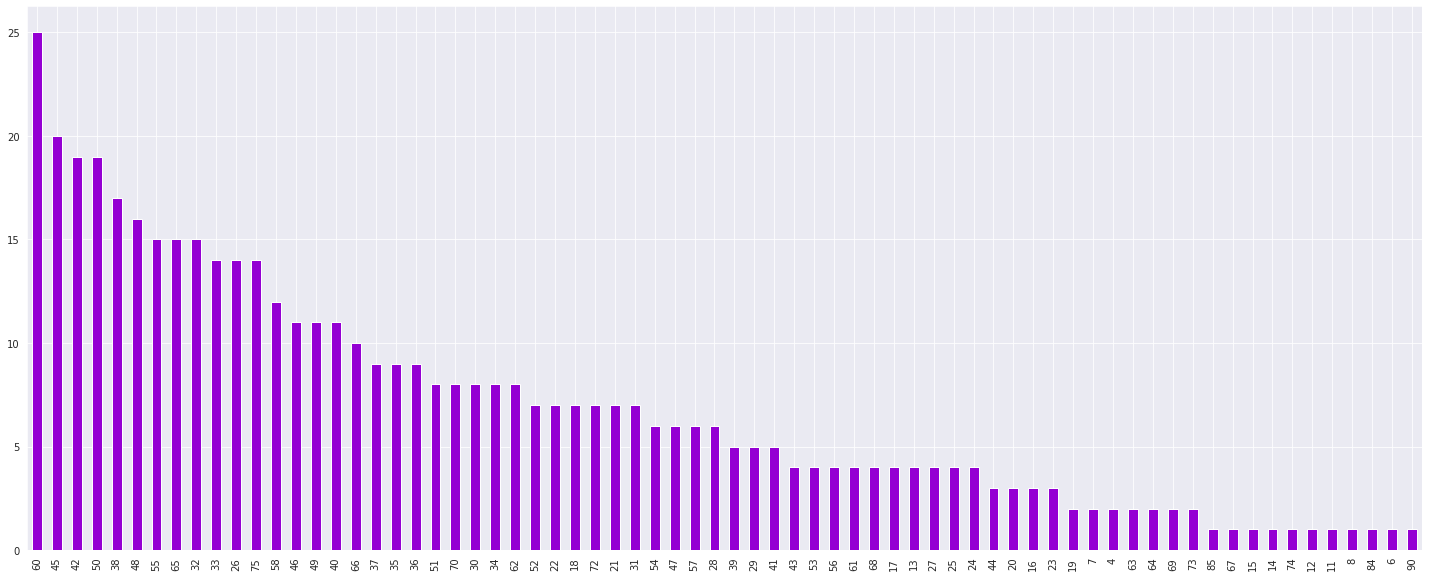

In [50]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
liver_df['Age'].value_counts().plot.bar(color='darkviolet')

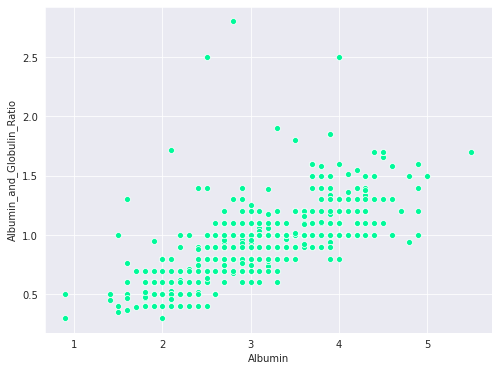

In [51]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio",color='mediumspringgreen',data=liver_df);
plt.show()

In [0]:
corr=liver_df.corr()


In [0]:
# Extract the labels
labels = np.array(liver_df.pop('Liver_Disease'))

In [0]:

liver_df = liver_df.select_dtypes('number')

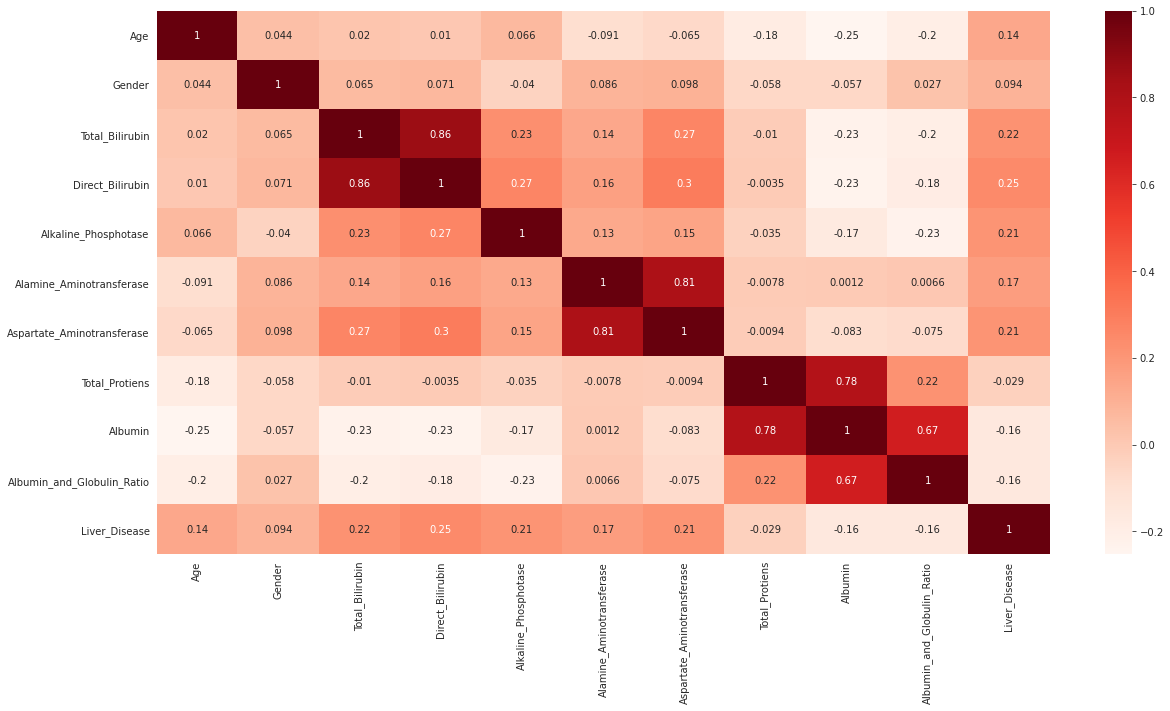

In [55]:
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Reds",annot=True)

In [58]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(liver_df, labels, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Liver_Disease'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no liver disease in oversampled data",len(os_data_y[os_data_y['Liver_Disease']==0]))
print("Number of  liver disease in oversampled data",len(os_data_y[os_data_y['Liver_Disease']==1]))
print("Proportion of no liver disease in oversampled data is ",len(os_data_y[os_data_y['Liver_Disease']==0])/len(os_data_X))
print("Proportion of  liver disease data in oversampled data is ",len(os_data_y[os_data_y['Liver_Disease']==1])/len(os_data_X))

length of oversampled data is  468
Number of no liver disease in oversampled data 234
Number of  liver disease in oversampled data 234
Proportion of no liver disease in oversampled data is  0.5
Proportion of  liver disease data in oversampled data is  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
inputdata = os_data_X
labels = os_data_y

In [60]:
train, test, train_labels, test_labels = train_test_split(inputdata,
                                         labels, 
                                         stratify = labels,
                                         test_size = 0.3, 
                                         random_state = 42)
print(len(train), "train +", len(test), "test")

327 train + 141 test


In [0]:
train = train.fillna(train.mean())
test = test.fillna(test.mean())

In [0]:
# Features for feature importances
features = list(train.columns)

In [0]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(train)
X_scaled.mean(axis=0)
X_scaled.std(axis=0)
scaler = preprocessing.StandardScaler().fit(train)
scaler.mean_
scaler.scale_ 
train = scaler.transform(train)
test = scaler.transform(test)

In [65]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Accuracy and F1-score using KNN model
KNN = KNeighborsClassifier(n_neighbors = 4)
KNN.fit(train, train_labels)
knn_pred = KNN.predict(test)
print('\n\tK Nearest Neighbors (NN = 4)\n')
print('Accuracy Score: ',metrics.accuracy_score(test_labels, knn_pred)*100, '%', sep = '')
print('Confusion Matrix: ',metrics.confusion_matrix(test_labels, knn_pred), sep = '\n')
print('\n')
print(classification_report(test_labels, knn_pred))


	K Nearest Neighbors (NN = 4)

Accuracy Score: 78.72340425531915%
Confusion Matrix: 
[[65  6]
 [24 46]]


              precision    recall  f1-score   support

           0       0.73      0.92      0.81        71
           1       0.88      0.66      0.75        70

    accuracy                           0.79       141
   macro avg       0.81      0.79      0.78       141
weighted avg       0.81      0.79      0.78       141



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


In [66]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, knn_pred))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        71
           1       0.88      0.66      0.75        70

    accuracy                           0.79       141
   macro avg       0.81      0.79      0.78       141
weighted avg       0.81      0.79      0.78       141

